# Урок 2. Обзор основных алгоритмов машинного обучения, используемых в соревнованиях

В домашнем задании, будем обучать разные алгоритмы машинного обучения. Для этого, нужно предварительно зафиксировать схему валидации решения (можете выбрать любую, которую знаете). Выбранную схему валидации нужно использовать во всех задачах этого домашнего задания. Метрика качества - ROC AUC, целевая переменная - isFraud.

Ссылка на данные - https://drive.google.com/file/d/1gMEVl47pIoV1-AseB9doQ6DZNJrY3NkW/view?usp=sharing

**Задание 1:** отобрать только числовые признаки и обучить модель XGBoost с параметром booster = gbtree. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

**Задание 2:** обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 1.

**Задание 4:** для числовых признаков обучить модель LightGBM. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

**Задание 5:** обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 4.

**Задание 6:** обработать категориальные признаки встроенным методом в LightGBM. Выполнить задание 4. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 5.

**Задание 7:** для числовых признаков обучить модель CatBoost. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

**Задание 8:** обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 7.

**Задание 9:** обработать категориальные признаки встроенным методом в CatBoost. Выполнить задание 7. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 8.

**Задание 10:** построить ROC-кривую для всех построенных алгоритмов на обучающей и тестовой выборке. Сделать выводы о работе алгоритмов с точки зрения качества на тестовой выборке и с точки зрения переобучения.


## Задание на повторение:
Задание не обязательно к выполнению, но очень рекомендуется для понимания набора данных, этот набор данных будет использован и для следующего домашнего задания.

**Задание 1:** Построить график распределения времени совершения транзакции для обучающей / тестовой выборки, сделать выводы о том, как разбиты данные и какие виды валидации могут подойти для данной задачи.

**Задание 2:** построить scatter-plot зависимости суммы транзакции от времени совершения транзакции. Построить графики для обучающей выборки и для тестовой выборки, для обучающей выборки - построить как для целевой переменной = 0, так и для переменной = 1. Сделать выводы.

**Задание 3:** построить распределение признака TransactionAmt в логарифмическом масштабе, сделать выводы о близости распредления к нормальному распределению. Построить распределение признака в логарифмическому масштабе для обучающей выборк и для тестовой выборки, сделать выводы.

**Задание 4:** построить распределение признака целевой переменной в зависимости от значений категориальных признаков ProductCD, card4, card6. Сделать выводы.


В домашнем задании, будем обучать разные алгоритмы машинного обучения. Для этого, нужно предварительно зафиксировать схему валидации решения (можете выбрать любую, которую знаете). Выбранную схему валидации нужно использовать во всех задачах этого домашнего задания. Метрика качества - ROC AUC, целевая переменная - isFraud.

Ссылка на данные - https://drive.google.com/file/d/1gMEVl47pIoV1-AseB9doQ6DZNJrY3NkW/view?usp=sharing


In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import catboost as cb
import lightgbm as lgb
import matplotlib.pyplot as plt
import missingno as msno
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

import seaborn as sns
import scipy.stats as st

import warnings
warnings.simplefilter("ignore")

In [2]:
train_df = pd.read_csv('./assignment2_data/assignment_2_train.csv')
test_df = pd.read_csv('./assignment2_data/assignment_2_test.csv')

In [3]:
print("train.shape = {} rows, {} cols".format(*train_df.shape))
print("test.shape = {} rows, {} cols".format(*test_df.shape))

train.shape = 180000 rows, 394 cols
test.shape = 100001 rows, 394 cols


Расмотрим, для начала, что из себя представляет датасет.

In [4]:
test_df.head(3)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3287000,1,7415038,226.00,W,12473,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3287001,0,7415054,3072.00,W,15651,417.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3287002,0,7415081,319.95,W,13844,583.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
test_df['isFraud'].value_counts()

0    96197
1     3804
Name: isFraud, dtype: int64

In [6]:
train_df.head(3)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
train_df['isFraud'].value_counts()

0    174859
1      5141
Name: isFraud, dtype: int64

Выборки что на обучении, что на тесте не сбалансированы. При обучении скорее всего придется отдельно выполнять баласировку. 

In [8]:
train_df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,1.800000e+05,180000.000000,1.800000e+05,180000.000000,180000.000000,177389.000000,179997.000000,179047.000000,160567.000000,160567.000000,...,47996.000000,47996.000000,47996.000000,47996.000000,47996.000000,47996.000000,47996.000000,47996.000000,47996.000000,47996.000000
mean,3.077000e+06,0.028561,1.909818e+06,129.514237,9860.225806,368.326897,153.410374,200.363089,291.160444,86.559903,...,0.137074,74.962242,99.220468,85.778161,8.326725,18.404676,12.437524,26.798593,32.005349,28.492421
std,5.196167e+04,0.166570,1.039029e+06,206.515032,4910.778205,158.952840,11.529483,40.585532,102.250385,3.958070,...,0.642444,545.161980,668.223140,577.072150,84.616132,120.896921,99.305885,252.695682,284.870583,258.372941
min,2.987000e+06,0.000000,8.640000e+04,0.292000,1001.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.032000e+06,0.000000,1.091681e+06,44.000000,6019.000000,215.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.077000e+06,0.000000,1.884075e+06,75.000000,9633.000000,375.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.121999e+06,0.000000,2.693196e+06,125.000000,14182.000000,514.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.166999e+06,1.000000,3.958317e+06,5278.950000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,15.000000,20750.000000,32250.000000,21250.000000,3100.000000,3350.000000,3250.000000,8250.000000,8250.000000,8250.000000


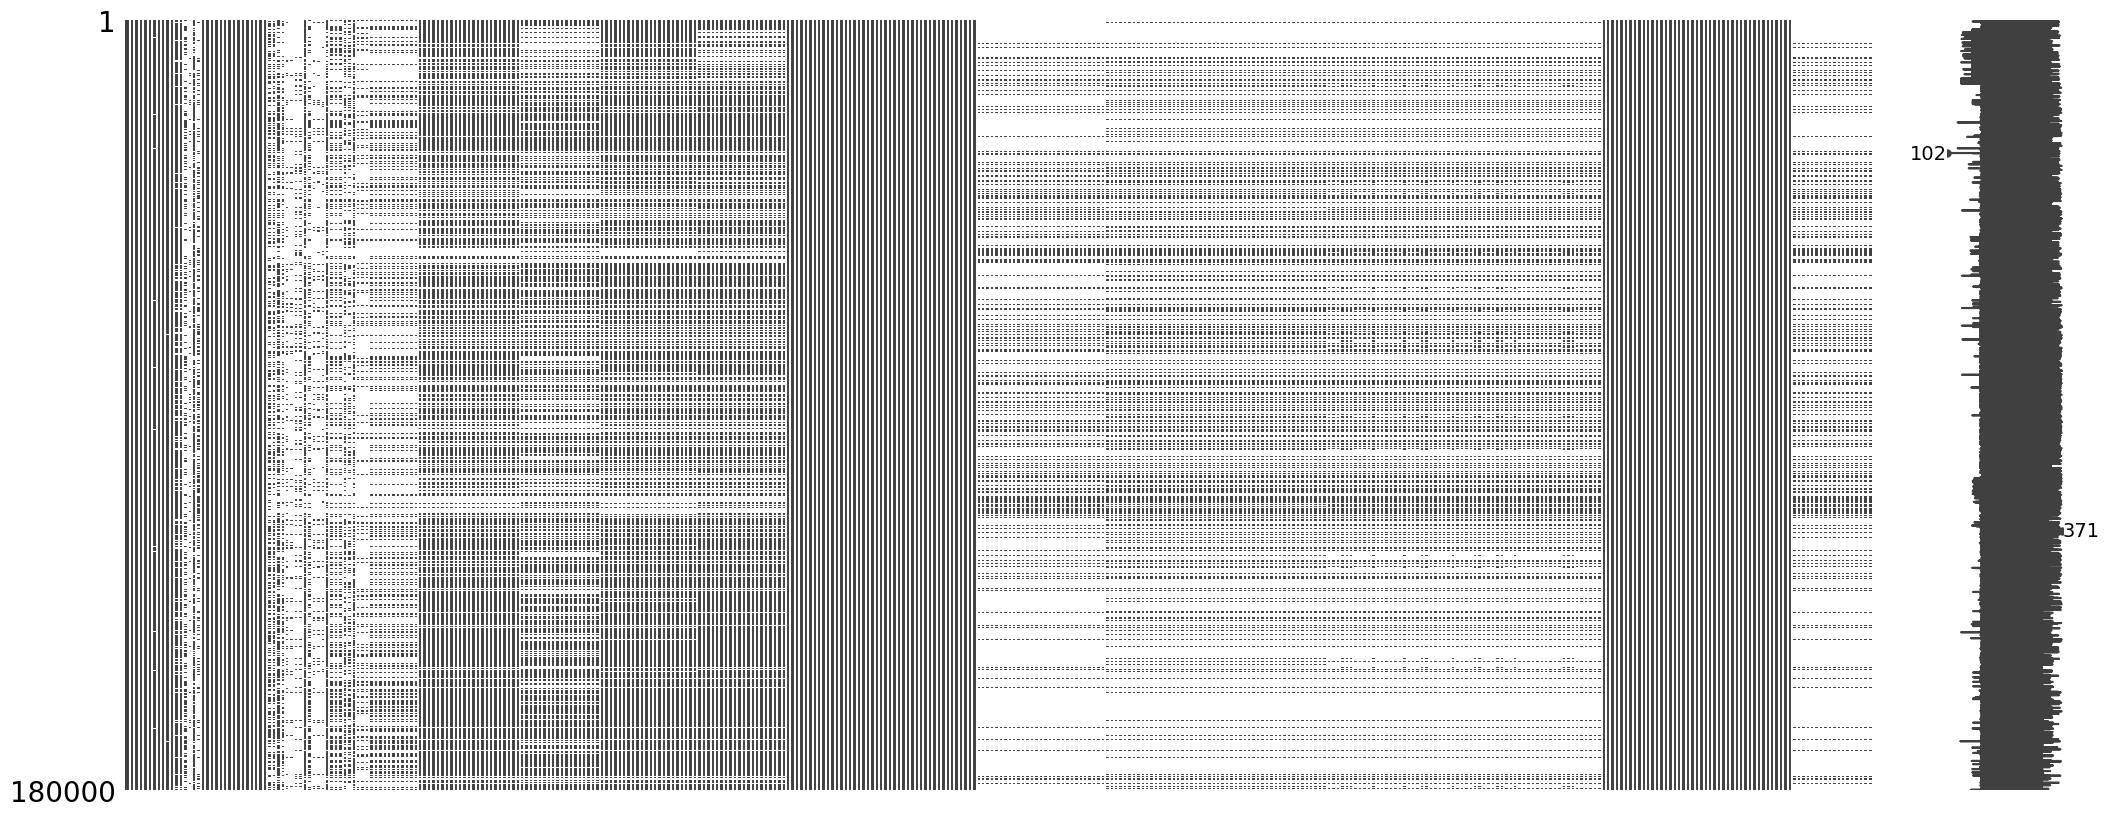

In [9]:
msno.matrix(train_df)
plt.show()

В наборе данных имеется большое к-во пропщенных значений. 

## Задание 1:
 Построить график распределения времени совершения транзакции для обучающей / тестовой выборки, сделать выводы о том, как разбиты данные и какие виды валидации могут подойти для данной задачи.

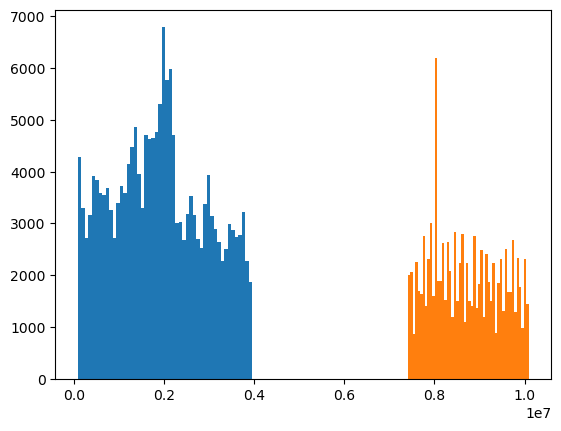

In [10]:
plt.hist(train_df['TransactionDT'], 50)
plt.hist(test_df['TransactionDT'], 50)
plt.show()

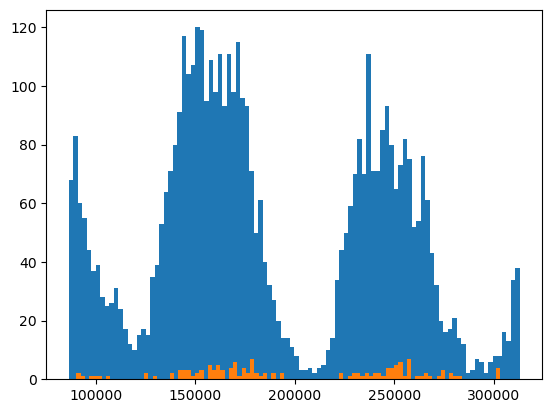

In [11]:
plt.hist(train_df.loc[((train_df['isFraud']==0) & (train_df['TransactionDT'][:10000]),'TransactionDT')], 100)
plt.hist(train_df.loc[((train_df['isFraud']==1) &  (train_df['TransactionDT'][:10000]),'TransactionDT')], 100)
plt.show()

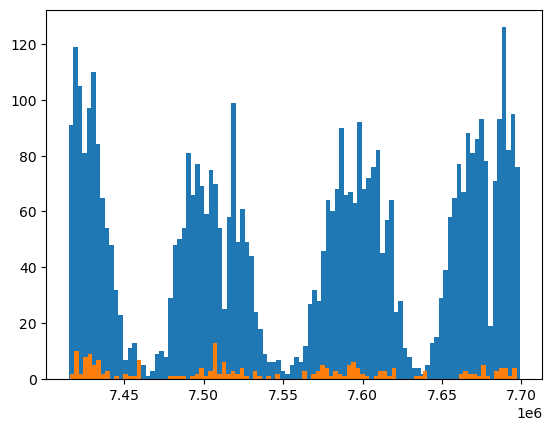

In [12]:
plt.hist(test_df.loc[((test_df['isFraud']==0) & (test_df['TransactionDT'][:10000]),'TransactionDT')], 100)
plt.hist(test_df.loc[((test_df['isFraud']==1) &  (test_df['TransactionDT'][:10000]),'TransactionDT')], 100)
plt.show()

## Задание 2:
построить scatter-plot зависимости суммы транзакции от времени совершения транзакции. Построить графики для обучающей выборки и для тестовой выборки, для обучающей выборки - построить как для целевой переменной = 0, так и для переменной = 1. Сделать выводы.

In [13]:
# TransactionAmt - сумма транзакции.
# TransactionDT - дата/время транзакции.

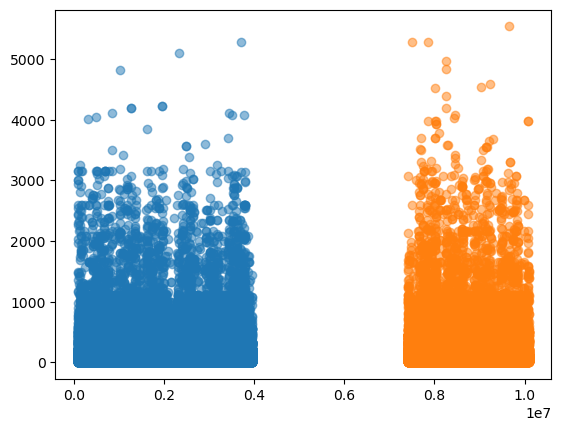

In [14]:
plt.scatter(train_df['TransactionDT'], train_df['TransactionAmt'], alpha=0.5)
plt.scatter(test_df['TransactionDT'], test_df['TransactionAmt'], alpha=0.5)
plt.show()

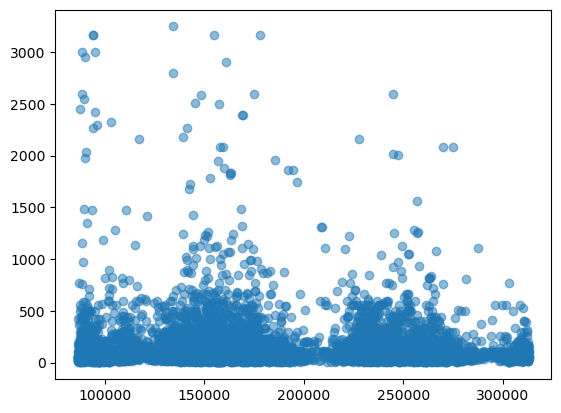

In [15]:
plt.scatter(train_df['TransactionDT'][:10000], train_df['TransactionAmt'][:10000], alpha=0.5)
plt.show()

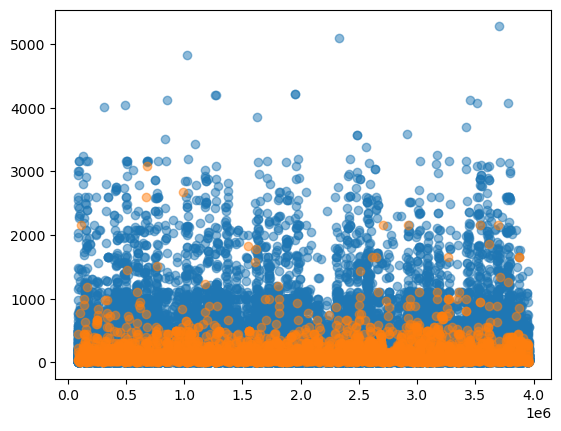

In [16]:
plt.scatter(train_df.loc[(train_df['isFraud']==0,'TransactionDT')],
            train_df.loc[(train_df['isFraud']==0,'TransactionAmt')], alpha=0.5)
plt.scatter(train_df.loc[(train_df['isFraud']==1,'TransactionDT')],
            train_df.loc[(train_df['isFraud']==1,'TransactionAmt')], alpha=0.5)
plt.show()

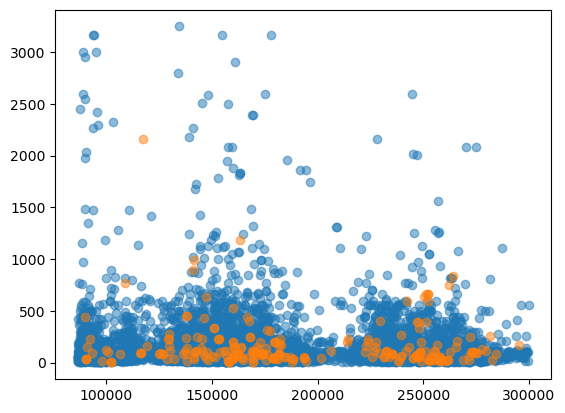

In [17]:
plt.scatter(train_df.loc[((train_df['isFraud']==0) & (train_df['TransactionDT']< 300000),'TransactionDT')],
            train_df.loc[((train_df['isFraud']==0) &  (train_df['TransactionDT']< 300000),'TransactionAmt')], alpha=0.5)
plt.scatter(train_df.loc[((train_df['isFraud']==1) &  (train_df['TransactionDT']< 300000),'TransactionDT')],
            train_df.loc[((train_df['isFraud']==1) &  (train_df['TransactionDT']< 300000),'TransactionAmt')], alpha=0.5)
plt.show()

Видно, что суммы транзакций имеют периодических характер во времени. К-во мошейнеческих транзакций также менятес с тесчением времени вцелом повторя динамику обычных. 

Если судить по графику, суммы мошейнеческих транзакций в целом вдое ниже чем суммы оычных. 

так если большая часть транзакций прнимает значение чуть больше 1000 у.е. , то мошейнеческие транзакции соврешаются на сумму до 500 у.е. 

## Задание 3:
 построить распределение признака TransactionAmt в логарифмическом масштабе, сделать выводы о близости распредления к нормальному распределению. Построить распределение признака в логарифмическому масштабе для обучающей выборк и для тестовой выборки, сделать выводы.


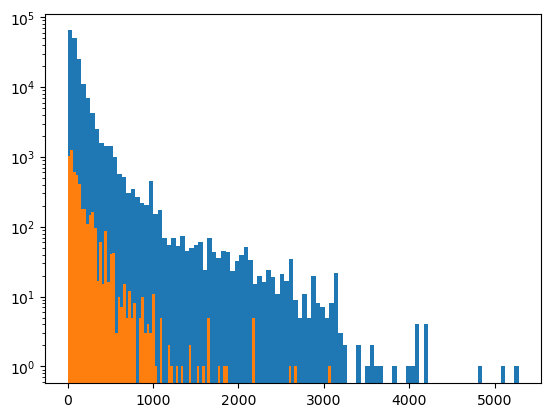

In [18]:
plt.hist(train_df.loc[(train_df['isFraud']==0, 'TransactionAmt') ], bins=100)
plt.hist(train_df.loc[(train_df['isFraud']==1, 'TransactionAmt') ], bins=100)
plt.yscale('log')
plt.show()

## Задание 4:
 построить распределение признака целевой переменной в зависимости от значений категориальных признаков ProductCD, card4, card6. Сделать выводы.

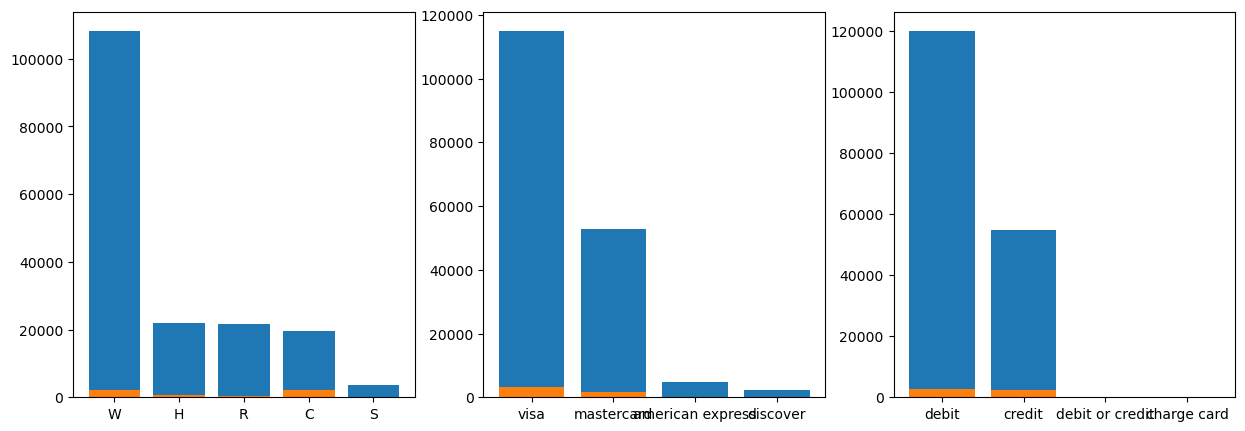

In [19]:
features = ['ProductCD', 'card4', 'card6']
fig, ax = plt.subplots(1,3, figsize=(15,5))

for i, feature in enumerate(features):
    values_list = train_df.loc[(train_df['isFraud']==0, feature)].value_counts()
    ax[i].bar( values_list.index, values_list.values)
    values_list = train_df.loc[(train_df['isFraud']==1, feature)].value_counts()
    ax[i].bar(values_list.index, values_list.values)
plt.show()

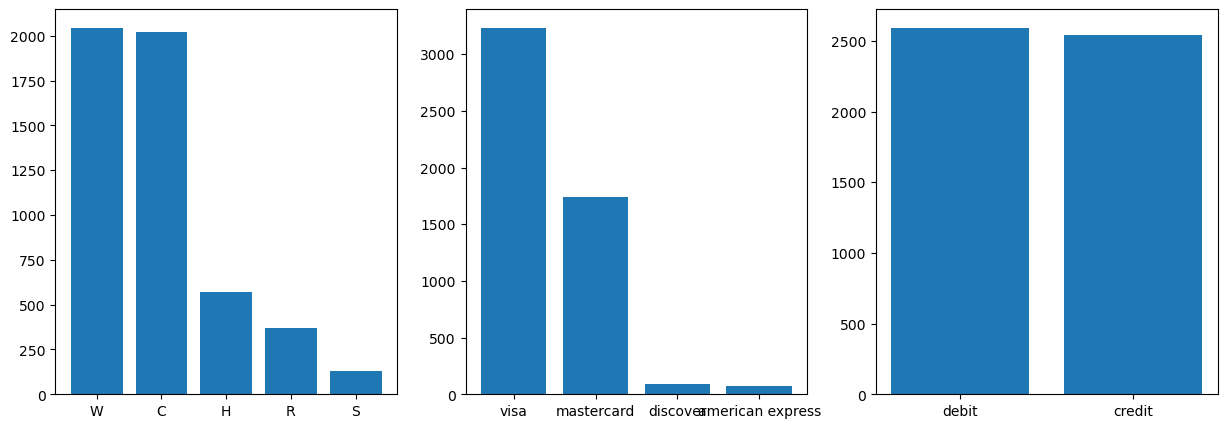

In [20]:
features = ['ProductCD', 'card4', 'card6']
fig, ax = plt.subplots(1,3, figsize=(15,5))

for i, feature in enumerate(features):
    values_list = train_df.loc[(train_df['isFraud']==1, feature)].value_counts()
    ax[i].bar(values_list.index, values_list.values)
plt.show()

## Обзор основных алгоритмов машинного обучения, используемых в соревнованиях

## Задание 1:
отобрать только числовые признаки и обучить модель XGBoost с параметром booster = gbtree. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

In [21]:
y_data_train = train_df['isFraud']
x_data_train = train_df.drop(['isFraud'],axis=1)

y_data_test = test_df['isFraud']
x_data_test = test_df.drop(['isFraud'],axis=1)

In [22]:
# Получим список катероиальных и числовых признаков.

categorical = []
numerical = []
for col, value in x_data_train.iteritems():
    if value.dtype == 'object':
        categorical.append(col)
    else:
        numerical.append(col)

In [23]:
x_data_train[categorical].head(5)

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,W,discover,credit,NaN,NaN,T,T,T,M2,F,T,NaN,NaN,NaN
1,W,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,W,visa,debit,outlook.com,NaN,T,T,T,M0,F,F,F,F,F
3,W,mastercard,debit,yahoo.com,NaN,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,H,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
x_data_train_num = x_data_train[numerical]
y_train = y_data_train

x_data_test_num = x_data_test[numerical]
y_valid = y_data_test

In [25]:
dtrain = xgb.DMatrix(
    data=x_data_train_num, label=y_train
)

dvalid = xgb.DMatrix(
    data=x_data_test_num, label=y_valid
)

In [26]:
params = {
    "booster": "gbtree",
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "learning_rate": 0.1,
    # "n_estimators": 10000,
    "reg_lambda": 50,
    "max_depth": 4,
    "gamma": 4,
    "nthread": 6,
    "seed": 27
}

In [27]:
xgb_model_1 = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=10000,
    early_stopping_rounds=50,
    evals=[(dtrain, "train"), (dvalid, "valid")],
    verbose_eval=25,
    maximize=True,
)

[0]	train-auc:0.63401	valid-auc:0.63204
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[25]	train-auc:0.84808	valid-auc:0.82511
[50]	train-auc:0.88692	valid-auc:0.85101
[75]	train-auc:0.89884	valid-auc:0.85417
[100]	train-auc:0.90554	valid-auc:0.85581
[125]	train-auc:0.91011	valid-auc:0.85768
[150]	train-auc:0.91405	valid-auc:0.85835
[175]	train-auc:0.91757	valid-auc:0.85909
[200]	train-auc:0.92032	valid-auc:0.85979
[225]	train-auc:0.92246	valid-auc:0.86069
[250]	train-auc:0.92498	valid-auc:0.86036
[275]	train-auc:0.92682	valid-auc:0.86067
Stopping. Best iteration:
[235]	train-auc:0.92362	valid-auc:0.86085



In [102]:
def draw_roc_auc(model, dtrain, dvalid, y_train, y_valid):
    y_pred_train = model.predict(dtrain)
    roc_auc_train=roc_auc_score(y_train, y_pred_train)
    # print(roc_auc_train)
    fpr_train, tpr_train, _ = metrics.roc_curve(y_train, y_pred_train)

    y_pred_val = model.predict(dvalid)
    roc_auc_val=roc_auc_score(y_valid, y_pred_val)
    # print(roc_auc_val)
    fpr_val, tpr_val, _ = metrics.roc_curve(y_valid, y_pred_val)

    plt.plot(fpr_train, tpr_train, 'b',color="blue", label = 'train_auc = %0.2f' % roc_auc_train)
    plt.plot(fpr_val, tpr_val, 'b', color="orange", label = 'val_auc = %0.2f' % roc_auc_val)
    
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

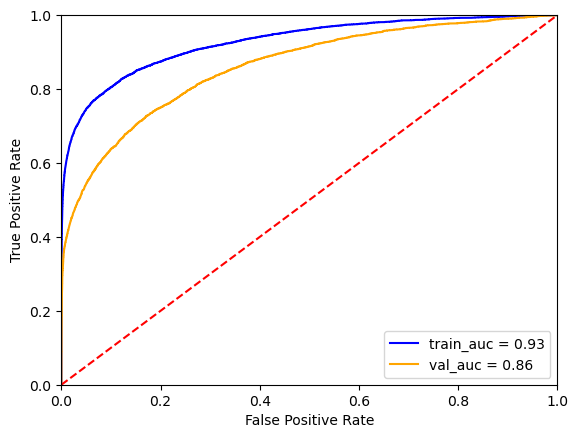

In [29]:
draw_roc_auc(xgb_model_1, dtrain, dvalid,y_train, y_valid )

## Задание 2:
обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 1.

Приведем категориалные фитчи к числовому виду.

In [31]:
def category_to_digit(df, features):  
    for i, feature in enumerate(features):
        # feature = str.replace(feature,' ','_')
        values_list = df[feature].value_counts()
        names = sorted(values_list.index)
        # names = sorted(names)
        for name in names:
            name = str.replace(name,' ','_')
            df.insert(3, f'{feature}_{name}', np.where((df[feature]==name),1,0), True)
            
    df.drop(features, axis=1, inplace=True)

In [32]:
print(categorical)

['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']


In [33]:
features = ['ProductCD', 'card4', 'card6', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']

x_data_train_cat = x_data_train.iloc[:]
x_data_test_cat = x_data_test.iloc[:]

category_to_digit(x_data_train_cat, features) # их нужно обрабатывать синхронно.
category_to_digit(x_data_test_cat, features)

# Удалим все категориальные признаки.
x_data_train_cat.drop(['P_emaildomain', 'R_emaildomain'], axis=1, inplace=True)
x_data_test_cat.drop(['P_emaildomain', 'R_emaildomain'], axis=1, inplace=True)

In [34]:
for x,y in list(zip(x_data_test_cat.columns, x_data_train_cat.columns)):
    if x!= y:
        print(x,y)

In [35]:
x_data_train_cat.head()

,TransactionID,TransactionDT,TransactionAmt,M9_T,M9_F,M8_T,M8_F,M7_T,M7_F,M6_T,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,86400,68.5,0,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,86401,29.0,0,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,86469,59.0,0,1,0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,86499,50.0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,86506,50.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
x_data_test_cat.head()

,TransactionID,TransactionDT,TransactionAmt,M9_T,M9_F,M8_T,M8_F,M7_T,M7_F,M6_T,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3287000,7415038,226.00,1,0,0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3287001,7415054,3072.00,0,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3287002,7415081,319.95,1,0,0,1,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3287003,7415111,171.00,1,0,1,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3287004,7415112,107.95,1,0,1,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Обучим модель на новых данных

In [37]:
xgb_dtrain_1 = xgb.DMatrix(
    data=x_data_train_cat, label=y_train
)

xgb_dvalid_1 = xgb.DMatrix(
    data=x_data_test_cat, label=y_valid
)

In [38]:
xgb_model_2 = xgb.train(
    params=params,
    dtrain=xgb_dtrain_1,
    num_boost_round=10000,
    early_stopping_rounds=50,
    evals=[(xgb_dtrain_1, "train"), (xgb_dvalid_1, "valid")],
    verbose_eval=25,
    maximize=True,
)

[0]	train-auc:0.63401	valid-auc:0.63204
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[25]	train-auc:0.86129	valid-auc:0.83936
[50]	train-auc:0.89135	valid-auc:0.85591
[75]	train-auc:0.90572	valid-auc:0.86009
[100]	train-auc:0.91327	valid-auc:0.86335
[125]	train-auc:0.91828	valid-auc:0.86603
[150]	train-auc:0.92169	valid-auc:0.86758
[175]	train-auc:0.92489	valid-auc:0.86864
[200]	train-auc:0.92711	valid-auc:0.86902
[225]	train-auc:0.93024	valid-auc:0.86960
[250]	train-auc:0.93248	valid-auc:0.86969
[275]	train-auc:0.93401	valid-auc:0.86995
[300]	train-auc:0.93563	valid-auc:0.87053
[325]	train-auc:0.93701	valid-auc:0.87078
[350]	train-auc:0.93792	valid-auc:0.87035
Stopping. Best iteration:
[321]	train-auc:0.93681	valid-auc:0.87095



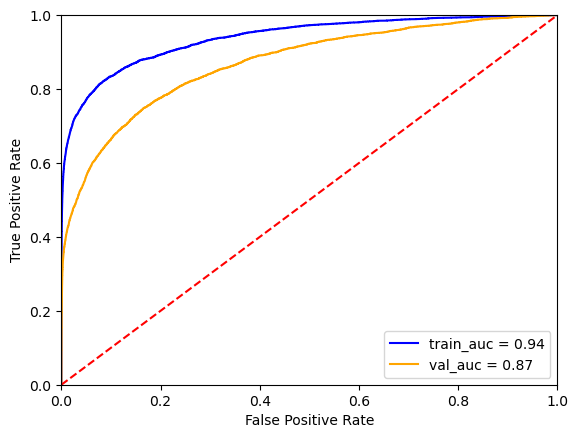

In [39]:
draw_roc_auc(xgb_model_2, xgb_dtrain_1, xgb_dvalid_1, y_train, y_valid )

## Задание 4:
для числовых признаков обучить модель LightGBM. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

In [40]:
params = {
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "auc",
    "learning_rate": 0.1,
    "n_estimators": 10000,
    # "reg_lambda": 50,
    # "max_depth": 4,
    "n_jobs": 6,
    "seed": 27
}

In [41]:
lgb_dtrain_1 = lgb.Dataset(
    data=x_data_train_num, label=y_train
)
lgb_dvalid_1 = lgb.Dataset(
    data=x_data_test_num, label=y_valid
)

In [42]:
lgb_model_1 = lgb.train(
    params=params,
    train_set=lgb_dtrain_1,
    num_boost_round=10000,
    valid_sets=[lgb_dtrain_1, lgb_dvalid_1],
    categorical_feature="auto",
    early_stopping_rounds=50,
    verbose_eval=25
)

[LightGBM] [Info] Number of positive: 5141, number of negative: 174859
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.115978 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 32181
[LightGBM] [Info] Number of data points in the train set: 180000, number of used features: 377
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.028561 -> initscore=-3.526732
[LightGBM] [Info] Start training from score -3.526732
Training until validation scores don't improve for 50 rounds
[25]	training's auc: 0.915802	valid_1's auc: 0.84922
[50]	training's auc: 0.940841	valid_1's auc: 0.853306
[75]	training's auc: 0.952896	valid_1's auc: 0.854611
[100]	training's auc: 0.96145	valid_1's auc: 0.852862
[125]	training's auc: 0.970642	valid_1's auc: 0.849535
Early stopping, best iteration is:
[79]	training's auc: 0.954433	valid_1's auc: 0.855132


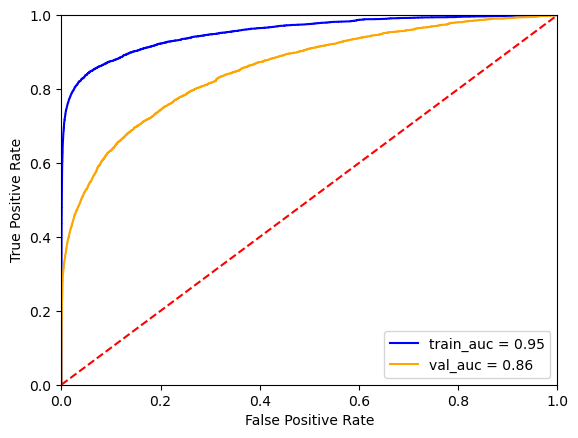

In [46]:
draw_roc_auc(lgb_model_1, x_data_train_num, x_data_test_num, y_train, y_valid)

## Задание 5:
обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 4.

In [47]:
lgb_dtrain_2 = lgb.Dataset(
    data=x_data_train_cat, label=y_train
)
lgb_dvalid_2 = lgb.Dataset(
    data=x_data_test_cat, label=y_valid
)

In [48]:
lgb_model_2 = lgb.train(
    params=params,
    train_set=lgb_dtrain_2,
    num_boost_round=10000,
    valid_sets=[lgb_dtrain_2, lgb_dvalid_2],
    early_stopping_rounds=50,
    verbose_eval=25
)

[LightGBM] [Info] Number of positive: 5141, number of negative: 174859
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.172522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 32237
[LightGBM] [Info] Number of data points in the train set: 180000, number of used features: 405
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.028561 -> initscore=-3.526732
[LightGBM] [Info] Start training from score -3.526732
Training until validation scores don't improve for 50 rounds
[25]	training's auc: 0.918961	valid_1's auc: 0.858102
[50]	training's auc: 0.944674	valid_1's auc: 0.862263
[75]	training's auc: 0.958944	valid_1's auc: 0.864617
[100]	training's auc: 0.96652	valid_1's auc: 0.861982
Early stopping, best iteration is:
[67]	training's auc: 0.955179	valid_1's auc: 0.864621


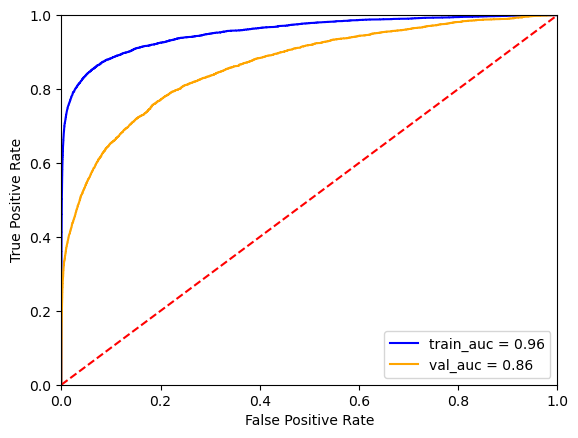

In [49]:
draw_roc_auc(lgb_model_2, x_data_train_cat, x_data_test_cat, y_train, y_valid )

## Задание 6:
обработать категориальные признаки встроенным методом в LightGBM. Выполнить задание 4. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 5.

In [108]:
# lgb.Dataset?
x_data_train

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,86400,68.50,W,13926,NaN,150.0,discover,142.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,86469,59.00,W,4663,490.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,credit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,3166995,3958217,39.00,W,1877,310.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179996,3166996,3958237,59.95,W,10075,514.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179997,3166997,3958241,34.00,W,6053,122.0,150.0,mastercard,195.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179998,3166998,3958260,59.00,W,7726,555.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
x_data_train[categorical]=x_data_train[categorical].astype('category')
x_data_test[categorical]=x_data_test[categorical].astype('category')

In [119]:
lgb_dtrain_3 = lgb.Dataset(
    data=x_data_train, label=y_train,categorical_feature=categorical
)
lgb_dvalid_3 = lgb.Dataset(
    data=x_data_test, label=y_valid,categorical_feature=categorical
)

In [111]:
type(categorical)

list

In [120]:
lgb_model_3 = lgb.train(
    params=params,
    train_set=lgb_dtrain_3,
    num_boost_round=10000,
    valid_sets=[lgb_dtrain_3, lgb_dvalid_3],
    # feature_name=categorical,
    categorical_feature=categorical,
    early_stopping_rounds=50,
    verbose_eval=25
)

[LightGBM] [Info] Number of positive: 5141, number of negative: 174859
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.141464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 32354
[LightGBM] [Info] Number of data points in the train set: 180000, number of used features: 391
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.028561 -> initscore=-3.526732
[LightGBM] [Info] Start training from score -3.526732
Training until validation scores don't improve for 50 rounds
[25]	training's auc: 0.923815	valid_1's auc: 0.86412
[50]	training's auc: 0.947623	valid_1's auc: 0.872721
[75]	training's auc: 0.963379	valid_1's auc: 0.873026
[100]	training's auc: 0.97156	valid_1's auc: 0.871067
[125]	training's auc: 0.976186	valid_1's auc: 0.869
Early stopping, best iteration is:
[76]	training's auc: 0.963559	valid_1's auc: 0.873086


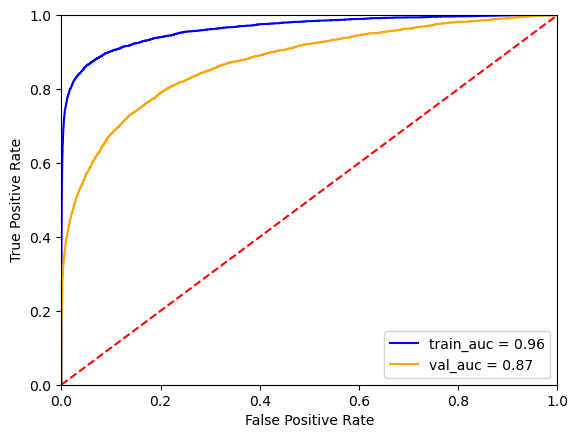

In [121]:
draw_roc_auc(lgb_model_3, x_data_train, x_data_test, y_train, y_valid )

## Задание 7:
для числовых признаков обучить модель CatBoost. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

In [60]:
cb_params = {
    "n_estimators": 10000,
    "loss_function": "Logloss",
    "eval_metric": "AUC",
    "task_type": "CPU",
    "max_bin": 20,
    "verbose": 25,
    "max_depth": 6,
    "l2_leaf_reg": 100,
    "early_stopping_rounds": 50,
    "thread_count": 6,
    "random_seed": 27
}

In [61]:
train_pool = cb.Pool(x_data_train_num, y_train)
valid_pool = cb.Pool(x_data_test_num, y_valid)

In [62]:
cat_model_1 = cb.CatBoostClassifier(**cb_params)
cat_model_1.fit(train_pool, eval_set=valid_pool)

0:	test: 0.6910253	best: 0.6910253 (0)	total: 293ms	remaining: 48m 47s
10:	test: 0.8063894	best: 0.8063894 (10)	total: 3s	remaining: 45m 21s
20:	test: 0.8211041	best: 0.8211041 (20)	total: 4.92s	remaining: 38m 59s
30:	test: 0.8292637	best: 0.8292637 (30)	total: 6.7s	remaining: 35m 54s
40:	test: 0.8352629	best: 0.8354361 (38)	total: 8.58s	remaining: 34m 43s
50:	test: 0.8367440	best: 0.8376213 (47)	total: 10.8s	remaining: 35m 15s
60:	test: 0.8359254	best: 0.8376213 (47)	total: 13.1s	remaining: 35m 40s
70:	test: 0.8352637	best: 0.8376213 (47)	total: 15.1s	remaining: 35m 5s
80:	test: 0.8350693	best: 0.8376213 (47)	total: 17s	remaining: 34m 47s
90:	test: 0.8338740	best: 0.8376213 (47)	total: 19s	remaining: 34m 24s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8376212927
bestIteration = 47

Shrink model to first 48 iterations.


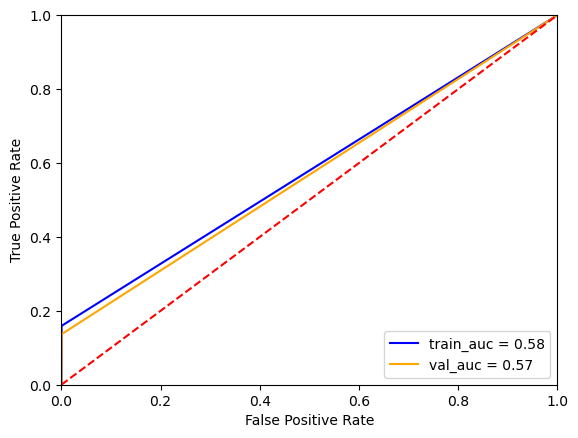

In [126]:
draw_roc_auc(cat_model_1, x_data_train_num, x_data_test_num, y_train, y_valid )

## Задание 8:
обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 7.

In [65]:
train_pool = cb.Pool(x_data_train_cat, y_train)
valid_pool = cb.Pool(x_data_test_cat, y_valid)

In [66]:
cat_model_2 = cb.CatBoostClassifier(**cb_params)
cat_model_2.fit(train_pool, eval_set=valid_pool)

0:	test: 0.6103841	best: 0.6103841 (0)	total: 154ms	remaining: 25m 39s
10:	test: 0.7511951	best: 0.7511951 (10)	total: 1.46s	remaining: 22m 10s
20:	test: 0.8115925	best: 0.8115925 (20)	total: 3.03s	remaining: 23m 58s
30:	test: 0.8212656	best: 0.8212656 (30)	total: 4.38s	remaining: 23m 29s
40:	test: 0.8287204	best: 0.8293736 (39)	total: 5.79s	remaining: 23m 26s
50:	test: 0.8335588	best: 0.8335588 (50)	total: 7.34s	remaining: 23m 51s
60:	test: 0.8379174	best: 0.8379174 (60)	total: 9s	remaining: 24m 26s
70:	test: 0.8415548	best: 0.8415548 (70)	total: 10.4s	remaining: 24m 14s
80:	test: 0.8401299	best: 0.8415548 (70)	total: 12.1s	remaining: 24m 38s
90:	test: 0.8399192	best: 0.8415548 (70)	total: 13.5s	remaining: 24m 25s
100:	test: 0.8418431	best: 0.8419352 (96)	total: 15.2s	remaining: 24m 47s
110:	test: 0.8414949	best: 0.8419352 (96)	total: 16.8s	remaining: 25m
120:	test: 0.8401854	best: 0.8419352 (96)	total: 17.9s	remaining: 24m 22s
130:	test: 0.8442196	best: 0.8447934 (127)	total: 19.7s	r

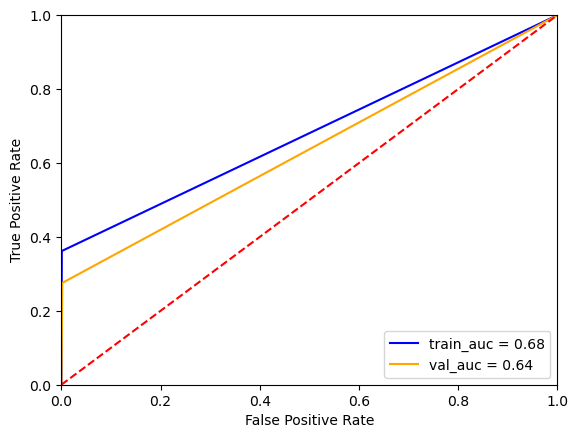

In [124]:
draw_roc_auc(cat_model_2, x_data_train_cat, x_data_test_cat, y_train, y_valid )

## Задание 9:
обработать категориальные признаки встроенным методом в CatBoost. Выполнить задание 7. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 8.

In [ ]:
x_data_train[categorical]=x_data_train[categorical].astype(str)
x_data_test[categorical]=x_data_test[categorical].astype(str)

In [116]:
train_pool = cb.Pool(x_data_train, y_train, cat_features=categorical)
valid_pool = cb.Pool(x_data_test, y_valid, cat_features=categorical)

In [117]:
cat_model_3 = cb.CatBoostClassifier(**cb_params)
cat_model_3.fit(train_pool, eval_set=valid_pool)

0:	test: 0.5605652	best: 0.5605652 (0)	total: 843ms	remaining: 2h 20m 27s
10:	test: 0.8004393	best: 0.8004393 (10)	total: 7.7s	remaining: 1h 56m 35s
20:	test: 0.8135860	best: 0.8153816 (15)	total: 16.1s	remaining: 2h 7m 25s
30:	test: 0.8268016	best: 0.8268016 (30)	total: 23.3s	remaining: 2h 4m 54s
40:	test: 0.8281328	best: 0.8284940 (38)	total: 27.5s	remaining: 1h 51m 29s
50:	test: 0.8300307	best: 0.8302434 (47)	total: 31.8s	remaining: 1h 43m 25s
60:	test: 0.8319341	best: 0.8336860 (51)	total: 35.7s	remaining: 1h 36m 53s
70:	test: 0.8369594	best: 0.8370307 (69)	total: 38.7s	remaining: 1h 30m 7s
80:	test: 0.8398045	best: 0.8399044 (79)	total: 42.5s	remaining: 1h 26m 49s
90:	test: 0.8435995	best: 0.8435995 (90)	total: 46.4s	remaining: 1h 24m 9s
100:	test: 0.8444864	best: 0.8451217 (98)	total: 53.6s	remaining: 1h 27m 36s
110:	test: 0.8438551	best: 0.8451217 (98)	total: 58.8s	remaining: 1h 27m 18s
120:	test: 0.8424815	best: 0.8451217 (98)	total: 1m 2s	remaining: 1h 25m 16s
130:	test: 0.843

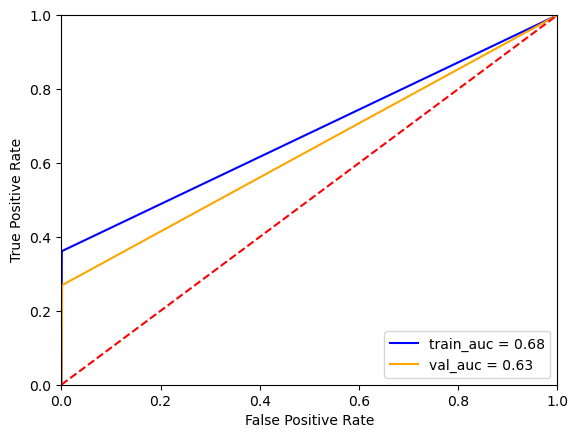

In [125]:
draw_roc_auc(cat_model_3, x_data_train, x_data_test, y_train, y_valid )

## Задание 10:
построить ROC-кривую для всех построенных алгоритмов на обучающей и тестовой выборке. Сделать выводы о работе алгоритмов с точки зрения качества на тестовой выборке и с точки зрения переобучения.

In [ ]:
# сделано выше->